In [ ]:
# Demonstrating Decision Tree
import pandas as pd

In [ ]:
#Load the dataset
df= pd.read_csv('/content/phishing_url.csv')
df.head(10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
1,ecnavi.jp,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
2,hubpages.com,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,extratorrent.cc,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,icicibank.com,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,nypost.com,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
6,kienthuc.net.vn,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
7,thenextweb.com,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
8,tobogo.net,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9,akhbarelyom.com,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
# Specify the X and y vectors
X = df.loc[:, df.columns != "Label"]
y = df["Label"]

In [ ]:
# Building the Model with Splits - using sk-learn API
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

In [ ]:
# Function to convert categorical columns using one-hot encoding
def OneHotEncode (df):
  import pandas as pd
  from sklearn.preprocessing import OneHotEncoder
  cat = []
  num = []
  for feat in df.columns:
    if(df[feat].dtype=='object'):
      cat.append(feat)
    else:
      num.append(feat)
  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  dummy_df = pd.DataFrame(encoder.fit_transform((df[cat])))
  dummy_df.index = df.index
  dummy_df.columns = encoder.get_feature_names_out(cat)
  df.drop(cat,axis=1,inplace = True)
  df = pd.concat([df,dummy_df],axis=1)
  return df

In [ ]:
## Using the function to one-hot encode the predictors
X = OneHotEncode(X)
X.head()

<ipython-input-13-4101266219>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cat,axis=1,inplace = True)


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,...,Domain_zonasegurabcp.movil-viabcp.com,Domain_zonaseguraweb1.bnv-pe.online,Domain_zonasegurobetabcp.com,Domain_zonsa.biz,Domain_zoohanpro.com,Domain_zoom.us,Domain_zoopla.co.uk,Domain_zozo.jp,Domain_zrq2y.weblium.site,Domain_zxe32szefr3.000webhostapp.com
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=7)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
DTree= model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
##Evaluating the Model with Confusion Matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

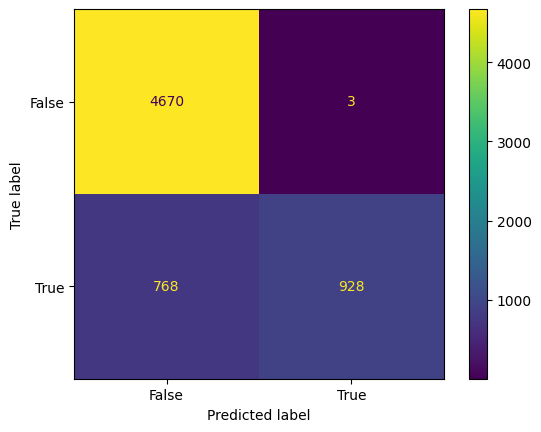

Accuracy: 87.89448893075836 %


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, "%")

In [ ]:
#Evaluating the Model with ROC
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

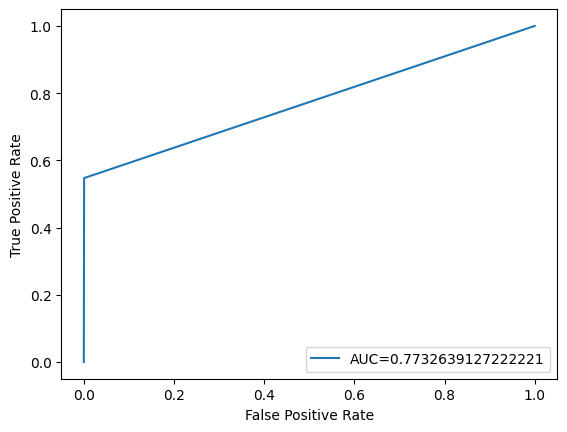

In [ ]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
#Plotting the feature importance for Top 10 most important columns
Predictors = list(X.columns.values)

<Axes: >

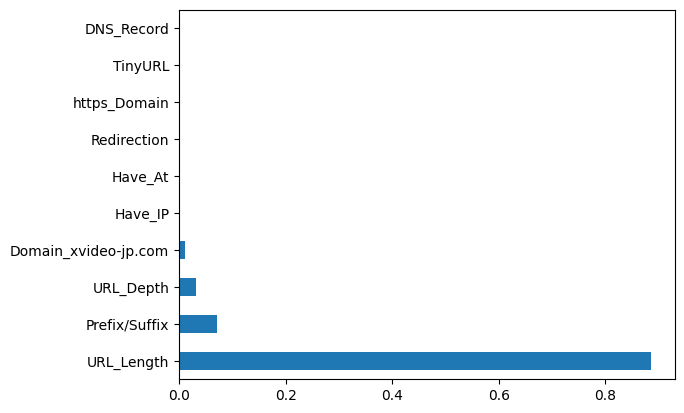

In [ ]:
# %matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

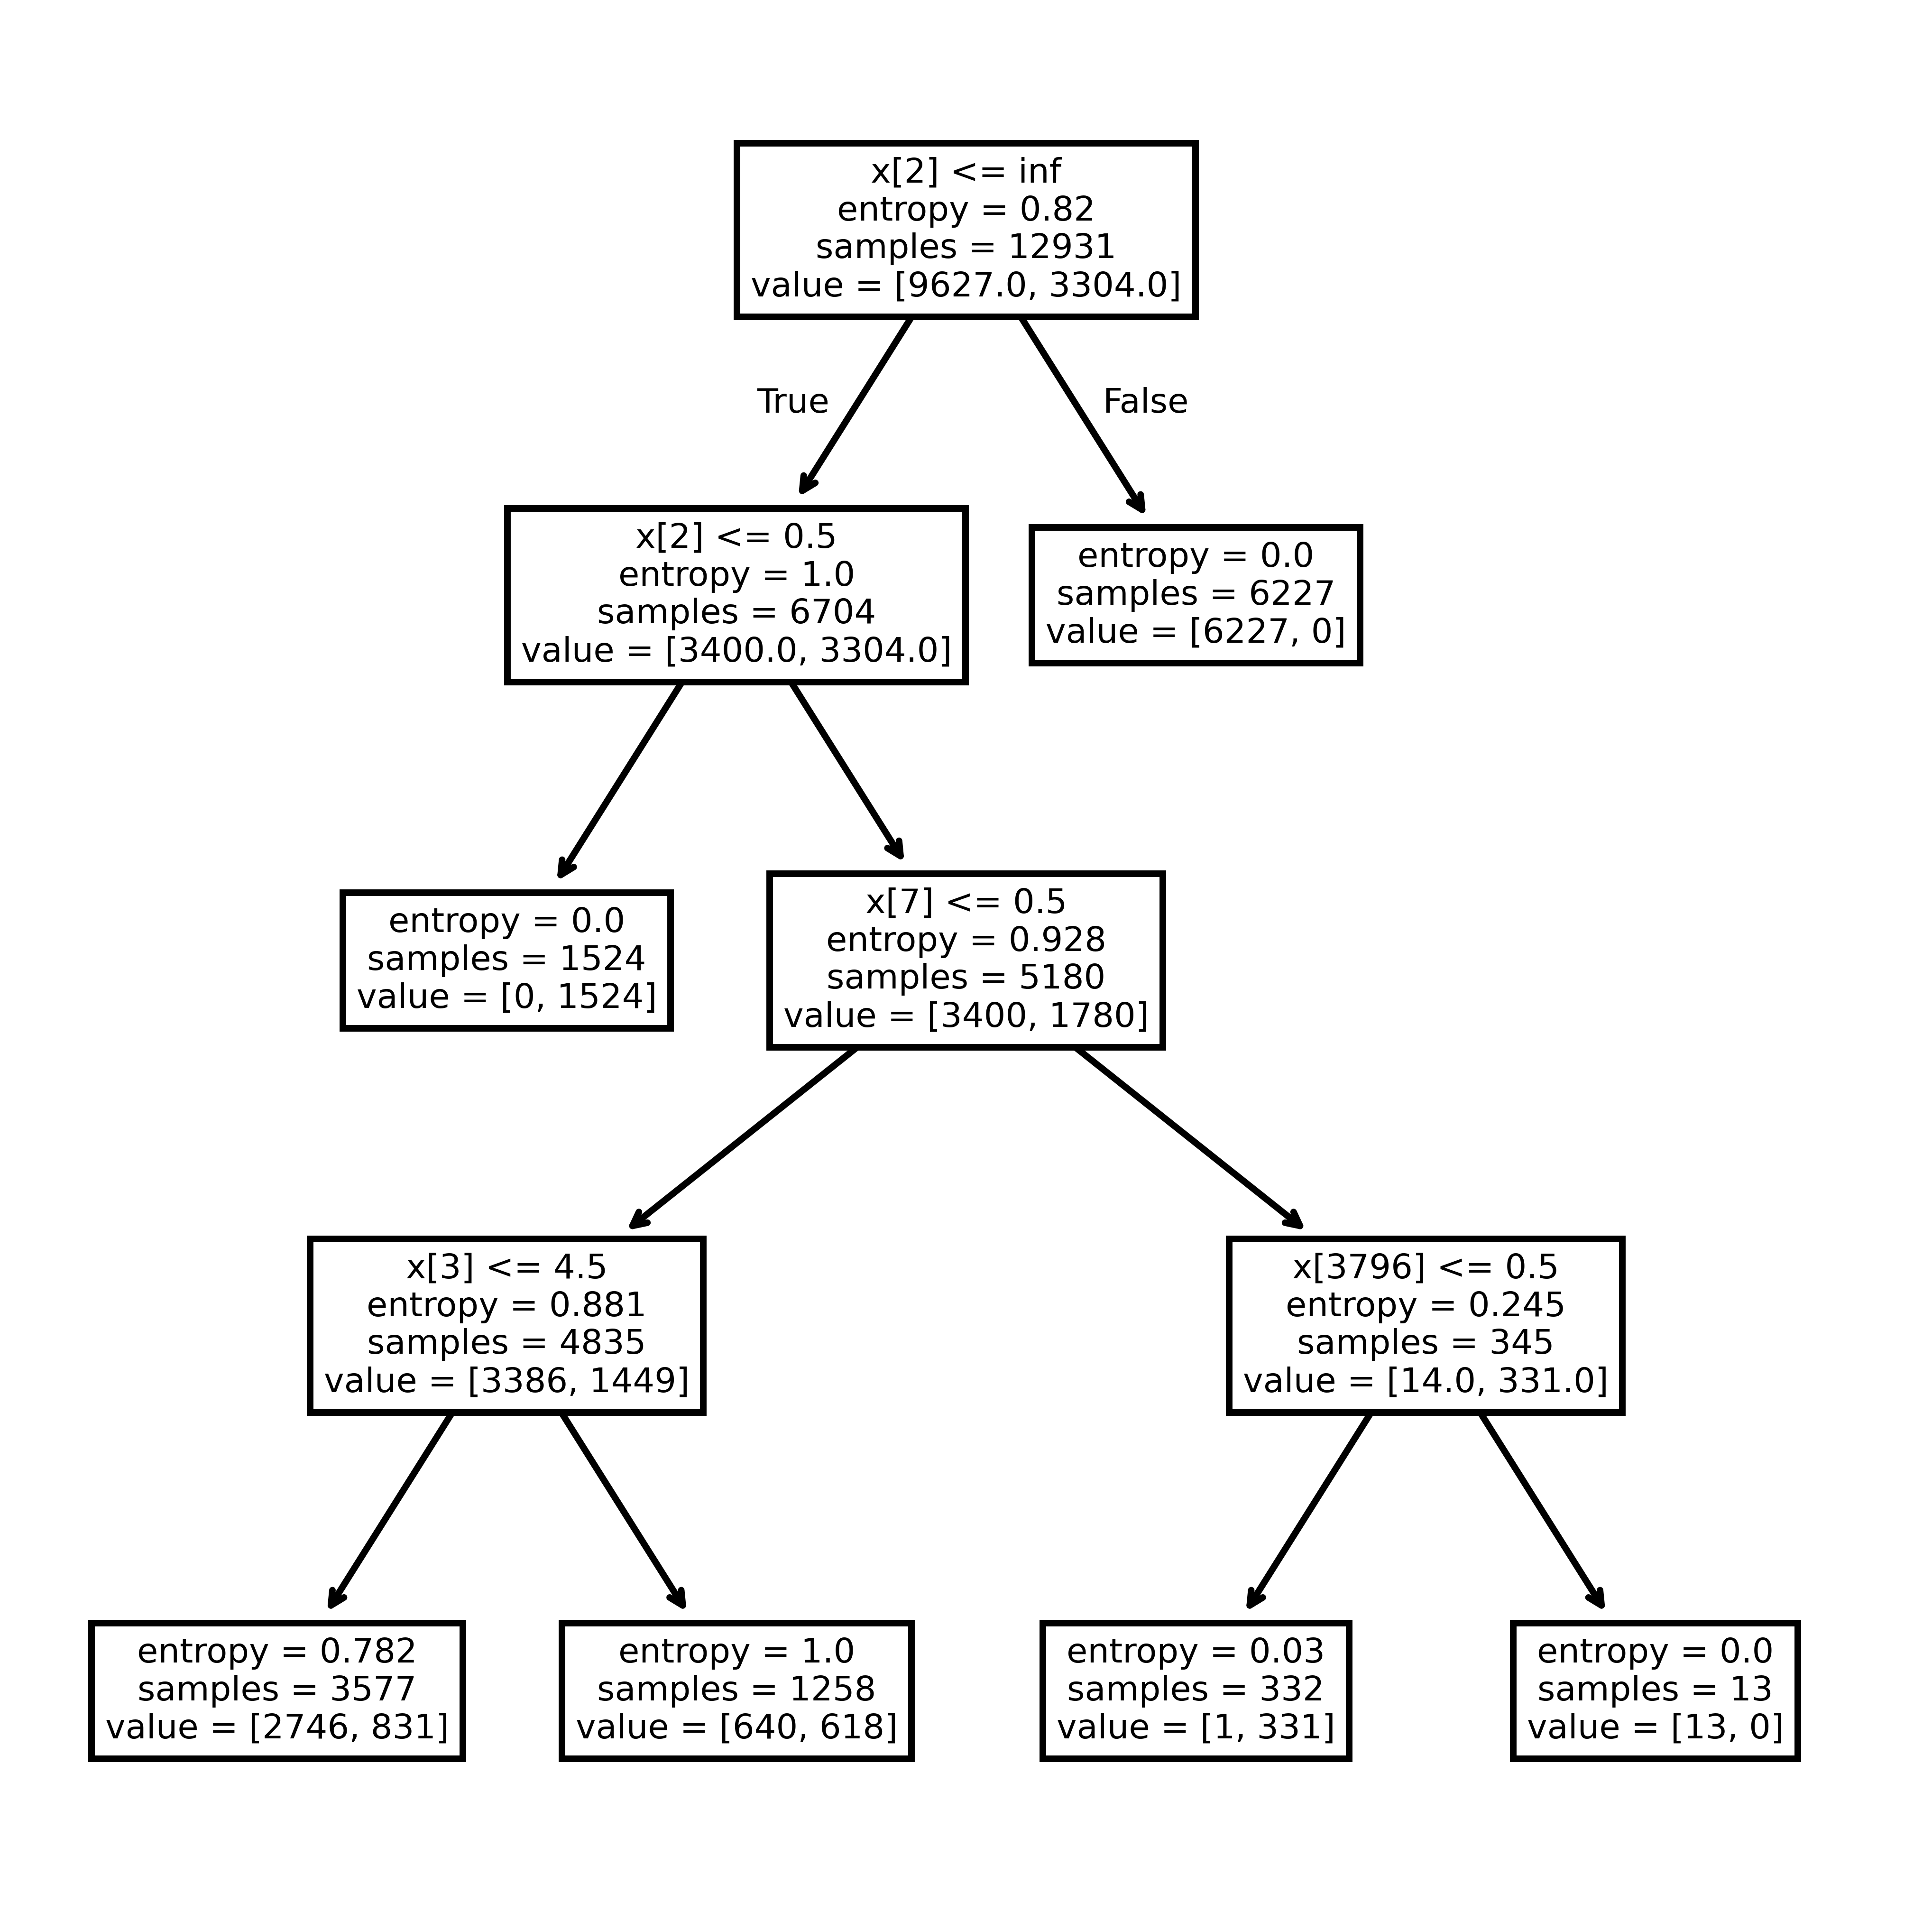

In [ ]:
## visualizing the decision tree - simple
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 1000)
tree.plot_tree(model);

[Text(0.5, 0.9, 'URL_Length <= inf\nentropy = 0.82\nsamples = 12931\nvalue = [9627.0, 3304.0]\nclass = 0'),
 Text(0.375, 0.7, 'URL_Length <= 0.5\nentropy = 1.0\nsamples = 6704\nvalue = [3400.0, 3304.0]\nclass = 0'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 1524\nvalue = [0, 1524]\nclass = 1'),
 Text(0.5, 0.5, 'Prefix/Suffix <= 0.5\nentropy = 0.928\nsamples = 5180\nvalue = [3400, 1780]\nclass = 0'),
 Text(0.25, 0.3, 'URL_Depth <= 4.5\nentropy = 0.881\nsamples = 4835\nvalue = [3386, 1449]\nclass = 0'),
 Text(0.125, 0.1, 'entropy = 0.782\nsamples = 3577\nvalue = [2746, 831]\nclass = 0'),
 Text(0.375, 0.1, 'entropy = 1.0\nsamples = 1258\nvalue = [640, 618]\nclass = 0'),
 Text(0.75, 0.3, 'Domain_xvideo-jp.com <= 0.5\nentropy = 0.245\nsamples = 345\nvalue = [14.0, 331.0]\nclass = 1'),
 Text(0.625, 0.1, 'entropy = 0.03\nsamples = 332\nvalue = [1, 331]\nclass = 1'),
 Text(0.875, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = 0'),
 Text(0.625, 0.7, '

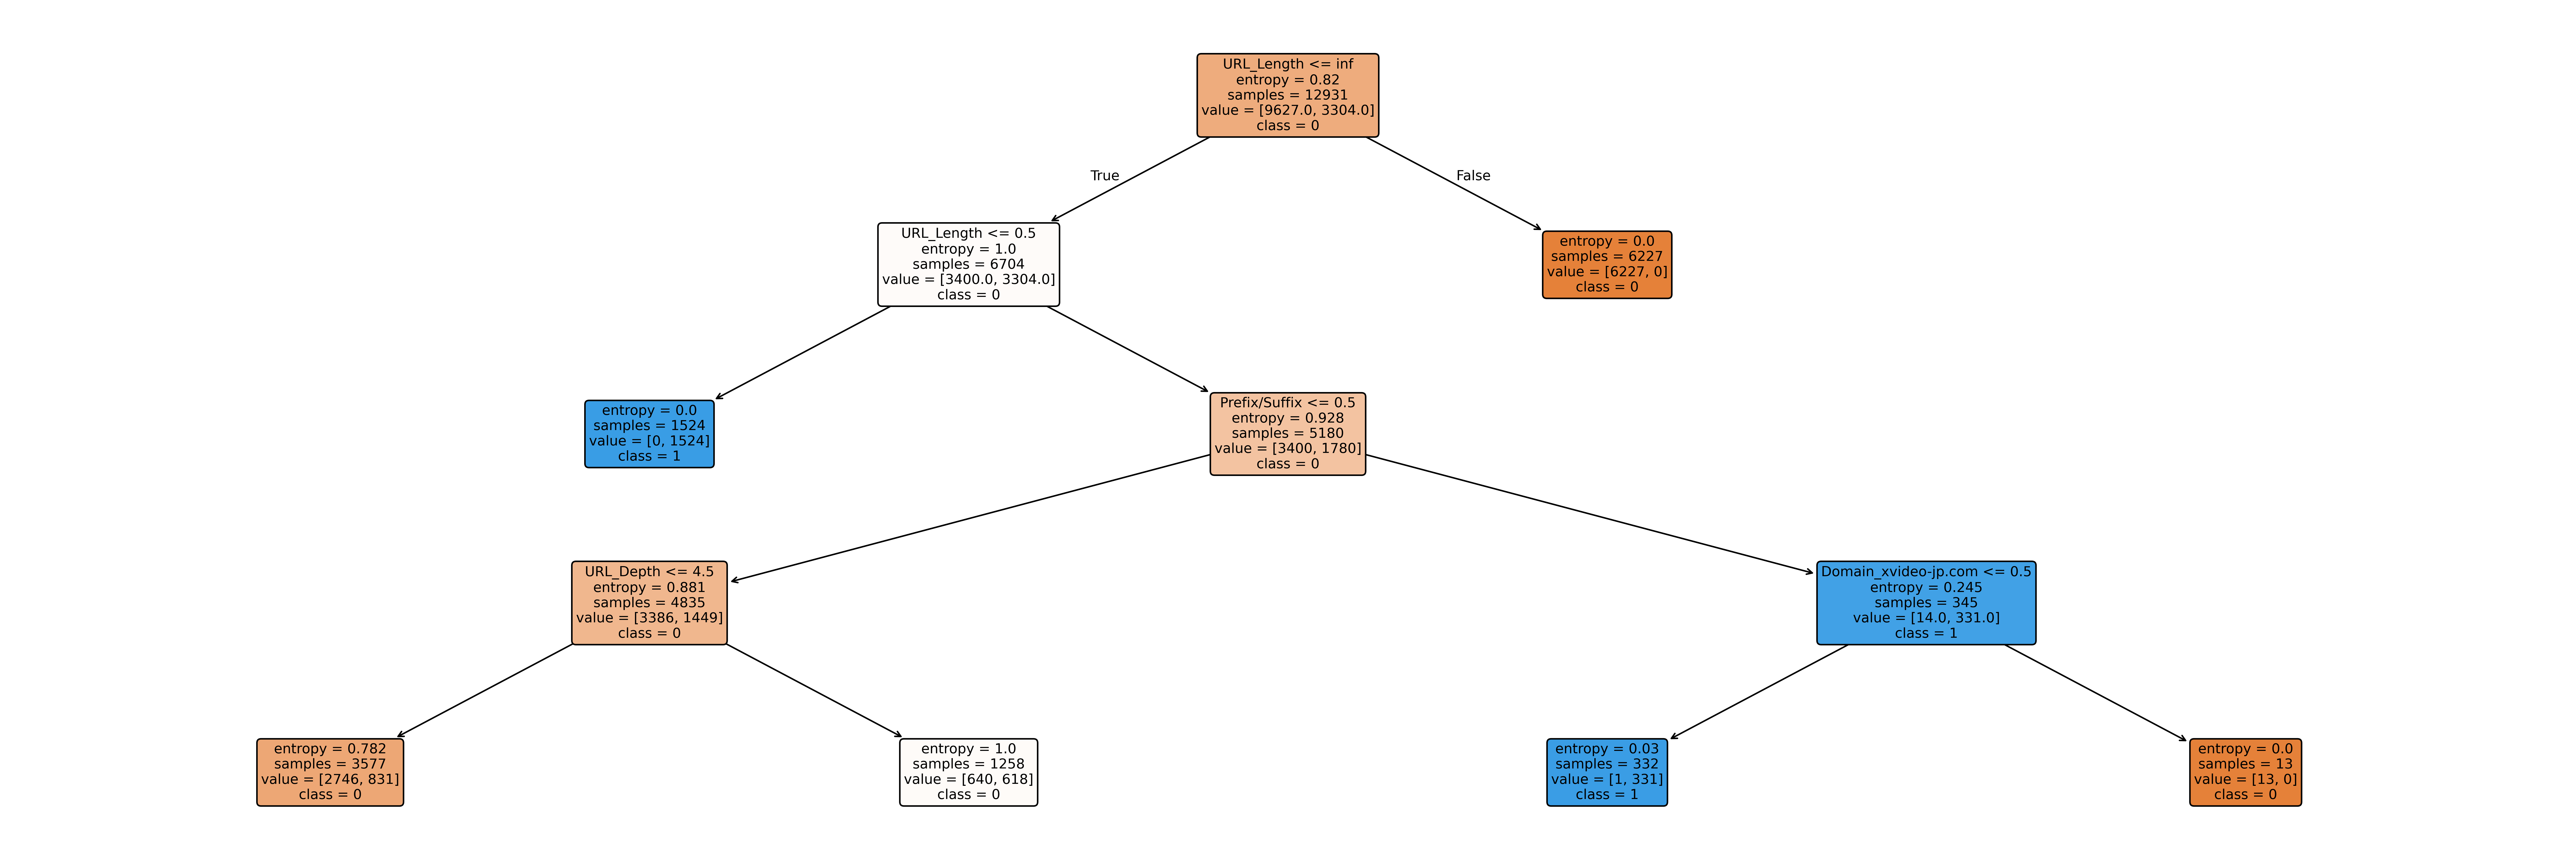

In [ ]:
# visualizing the decision tree - with predictor names
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
feature_names = X_train.columns.to_list()
target_names = df['Label'].unique().tolist()
target_namestxt = [str(x) for x in target_names]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,10), dpi=500)
plot_tree(model,feature_names = feature_names, class_names = target_namestxt,     filled = True,      rounded = True, fontsize=9)